In [1]:
library(dplyr)
library(ggplot2)
library(data.table)
library(Hmisc)
library(MESS)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

Warning message:
"package 'Hmisc' was built under R version 3.5.2"Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units

Loading required package: geepack
Loading required package: geeM
Loading required package: Matrix


In [3]:
wea22.imp <- read.csv(file="C:/Users/Chen/Project/data/wea22.imp.csv")

In [4]:
head(wea22.imp)

ID,Station2,Date2,Tmax2,Tmin2,Tavg2,DewPoint2,WetBulb2,Heat2,Cool2,...,RA,SN,SQ,TS,TSRA,VCFG,VCTS,Tmax2.imp,Tavg2.imp,PrecipTotal2.imp
1,2,2007-05-01,84,52,33,51,26,1,4,...,0,0,0,0,0,0,0,84,33.00000,0
2,2,2007-05-02,60,43,17,42,16,6,1,...,0,0,0,0,0,0,0,60,17.00000,0
3,2,2007-05-03,67,48,23,40,19,28,1,...,0,0,0,0,0,0,0,67,23.00000,0
4,2,2007-05-04,78,51,NA,42,19,NA,NA,...,0,0,0,0,0,0,0,78,35.20733,0
5,2,2007-05-05,66,54,25,39,19,26,1,...,0,0,0,0,0,0,0,66,25.00000,0
6,2,2007-05-06,68,52,25,30,15,26,1,...,0,0,0,0,0,0,0,68,25.00000,0


In [5]:
dim(wea22.imp)

[1] 1472   34

In [10]:
colnames(wea22.imp)

[1] "ID"               "Station2"         "Date2"            "Tmax2"           
 [5] "Tmin2"            "Tavg2"            "DewPoint2"        "WetBulb2"        
 [9] "Heat2"            "Cool2"            "PrecipTotal2"     "StnPressure2"    
[13] "SeaLevel2"        "ResultSpeed2"     "ResultDir2"       "AvgSpeed2"       
[17] "BCFG"             "BR"               "DZ"               "FG"              
[21] "FG."              "FU"               "GR"               "HZ"              
[25] "RA"               "SN"               "SQ"               "TS"              
[29] "TSRA"             "VCFG"             "VCTS"             "Tmax2.imp"       
[33] "Tavg2.imp"        "PrecipTotal2.imp"

In [13]:
colnames(wea22.imp) <- c('ID', 'Station2', 'Date2', 'Tmax2', 'Tmin2', 'Tavg2', 'DewPoint2','WetBulb2' ,'Heat2' ,'Cool2', 'PrecipTotal2', 'StnPressure2', 'SeaLevel2', 'ResultSpeed2', 'ResultDir2', 'AvgSpeed2', 'BCFG2', 'BR2', 'DZ2', 'FG2', 'FG.2', 'FU2', 'GR2', 'HZ2', 'RA2', 'SN2' ,'SQ2', 'TS2', 'TSRA2', 'VCFG2', 'VCTS2', 'Tmax2.imp', 'Tavg2.imp', 'PrecipTotal2.imp')


In [14]:
head(wea22.imp)

ID,Station2,Date2,Tmax2,Tmin2,Tavg2,DewPoint2,WetBulb2,Heat2,Cool2,...,RA2,SN2,SQ2,TS2,TSRA2,VCFG2,VCTS2,Tmax2.imp,Tavg2.imp,PrecipTotal2.imp
1,2,2007-05-01,84,52,33,51,26,1,4,...,0,0,0,0,0,0,0,84,33.00000,0
2,2,2007-05-02,60,43,17,42,16,6,1,...,0,0,0,0,0,0,0,60,17.00000,0
3,2,2007-05-03,67,48,23,40,19,28,1,...,0,0,0,0,0,0,0,67,23.00000,0
4,2,2007-05-04,78,51,NA,42,19,NA,NA,...,0,0,0,0,0,0,0,78,35.20733,0
5,2,2007-05-05,66,54,25,39,19,26,1,...,0,0,0,0,0,0,0,66,25.00000,0
6,2,2007-05-06,68,52,25,30,15,26,1,...,0,0,0,0,0,0,0,68,25.00000,0


In [6]:
wea22.imp$Date2<- as.Date(wea22.imp$Date2, format = "%Y-%m-%d")

In [15]:
write.csv(wea22.imp, file="C:/Users/Chen/Project/data/wea22.imp.csv", row.names =F)

In [16]:
str(wea22.imp)

'data.frame':	1472 obs. of  34 variables:
 $ ID              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Station2        : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Date2           : Date, format: "2007-05-01" "2007-05-02" ...
 $ Tmax2           : int  84 60 67 78 66 68 84 80 76 83 ...
 $ Tmin2           : int  52 43 48 51 54 52 50 60 63 59 ...
 $ Tavg2           : int  33 17 23 NA 25 25 32 35 35 36 ...
 $ DewPoint2       : int  51 42 40 42 39 30 39 57 60 52 ...
 $ WetBulb2        : int  26 16 19 19 19 15 22 32 32 30 ...
 $ Heat2           : int  1 6 28 NA 26 26 1 1 1 1 ...
 $ Cool2           : int  4 1 1 NA 1 1 3 6 6 7 ...
 $ PrecipTotal2    : num  0 0 0 0 0 0 0 0 0.02 0 ...
 $ StnPressure2    : num  29.2 29.4 29.5 29.4 29.5 ...
 $ SeaLevel2       : num  29.8 30.1 30.1 30 30.1 ...
 $ ResultSpeed2    : num  2.7 13.3 12.9 10.1 11.2 13.8 8.5 2.5 3.9 2 ...
 $ ResultDir2      : int  25 2 6 7 7 10 17 8 7 9 ...
 $ AvgSpeed2       : num  9.6 13.4 13.2 10.4 11.5 14.5 9.9 5.4 5.9 3.9 ...
 $ BCFG2           : int 

### Total number of raining days in the last 45 days
I see that there is only one station in this dataset, and there are 1472 rows.
The firs think you want is the sum of the raining (RA) days in the last 45 days. Take into account that there will be 45 missing values entered for the first 45 days.
We will use the xts (time series object) to create a TS for the actual date and the rain:

In [17]:
library(xts)
q <- wea22.imp[,c("Date2","RA2")]
qxts <- xts(q[,"RA2"], order.by=q[,"Date2"])
names(qxts) <- "RA2"

In [22]:
head(qxts)

           RA2 RA45.2
2007-05-01   0     NA
2007-05-02   0     NA
2007-05-03   0     NA
2007-05-04   0     NA
2007-05-05   0     NA
2007-05-06   0     NA

In [23]:
library(quantmod)

qxts$RA45.2 = runSum(qxts$RA2,n=45)
head(qxts,50)


           RA2 RA45.2
2007-05-01   0     NA
2007-05-02   0     NA
2007-05-03   0     NA
2007-05-04   0     NA
2007-05-05   0     NA
2007-05-06   0     NA
2007-05-07   0     NA
2007-05-08   0     NA
2007-05-09   0     NA
2007-05-10   0     NA
2007-05-11   0     NA
2007-05-12   0     NA
2007-05-13   0     NA
2007-05-14   0     NA
2007-05-15   1     NA
2007-05-16   1     NA
2007-05-17   0     NA
2007-05-18   0     NA
2007-05-19   0     NA
2007-05-20   1     NA
2007-05-21   0     NA
2007-05-22   0     NA
2007-05-23   0     NA
2007-05-24   1     NA
2007-05-25   1     NA
2007-05-26   1     NA
2007-05-27   1     NA
2007-05-28   0     NA
2007-05-29   0     NA
2007-05-30   0     NA
2007-05-31   1     NA
2007-06-01   0     NA
2007-06-02   1     NA
2007-06-03   1     NA
2007-06-04   1     NA
2007-06-05   1     NA
2007-06-06   1     NA
2007-06-07   0     NA
2007-06-08   0     NA
2007-06-09   0     NA
2007-06-10   0     NA
2007-06-11   0     NA
2007-06-12   0     NA
2007-06-13   0     NA
2007-06-14

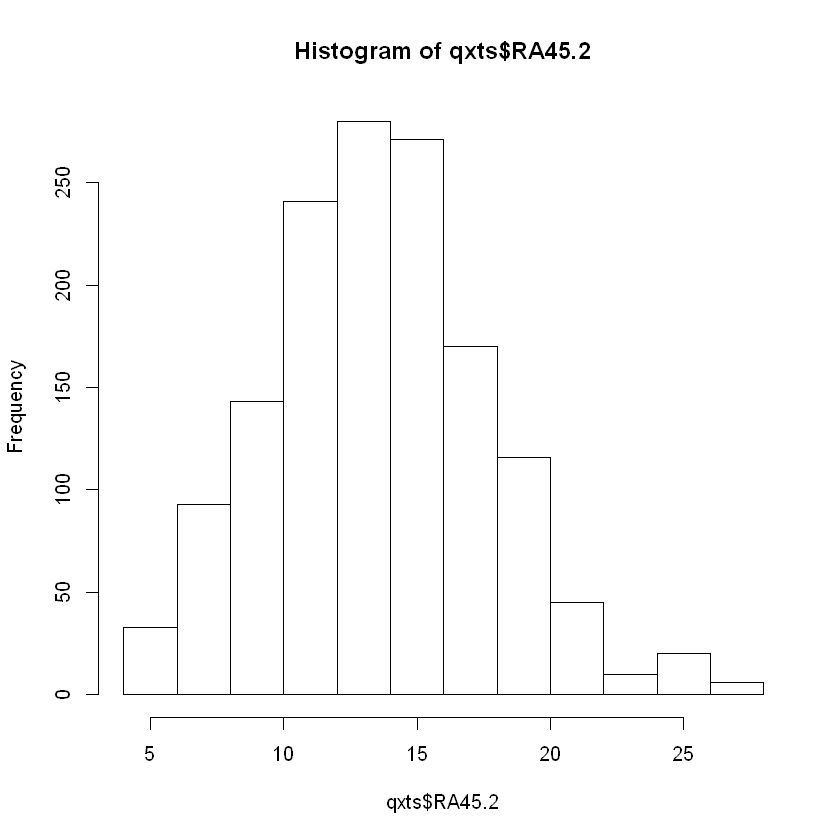

In [26]:
hist(qxts$RA45.2)

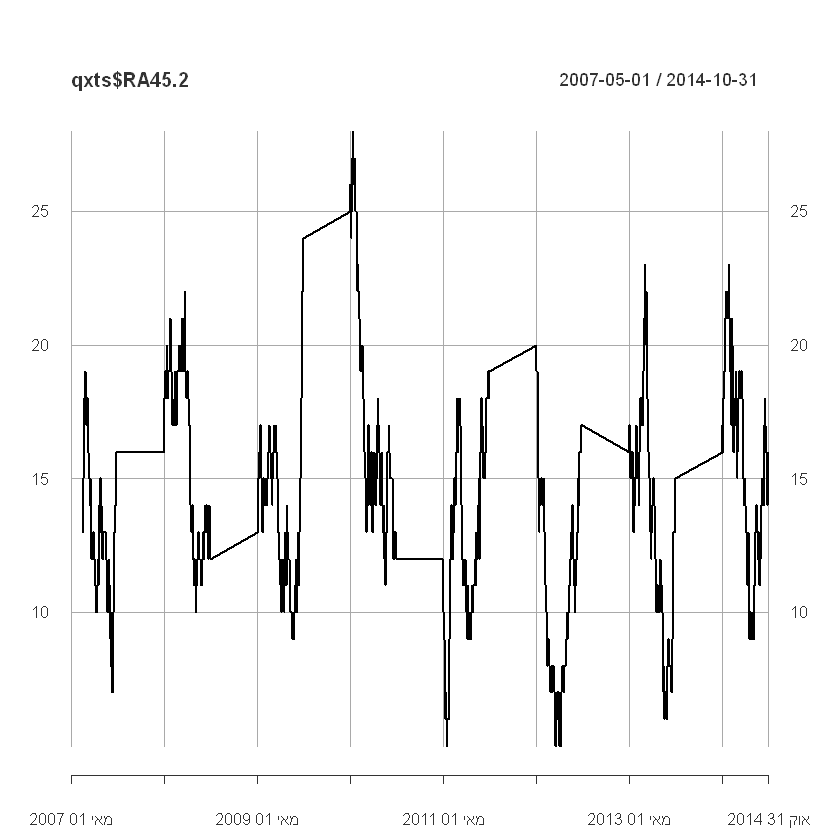

In [27]:
plot(qxts$RA45.2)

Now we have to reverse the TS to a dataframe and join with the original dataset

In [32]:
rain45.2 <- data.frame(qxts$RA45.2)
rain45.2$Date2 <- as.Date(rownames(rain45.2))
head(rain45.2)
str(rain45.2)

,RA45.2,Date2
2007-05-01,NA,2007-05-01
2007-05-02,NA,2007-05-02
2007-05-03,NA,2007-05-03
2007-05-04,NA,2007-05-04
2007-05-05,NA,2007-05-05
2007-05-06,NA,2007-05-06


'data.frame':	1472 obs. of  2 variables:
 $ RA45.2: num  NA NA NA NA NA NA NA NA NA NA ...
 $ Date2 : Date, format: "2007-05-01" "2007-05-02" ...


In [34]:
wea22.imp <- left_join(wea22.imp, rain45.2, by="Date2")
head(wea22.imp,50)

ID,Station2,Date2,Tmax2,Tmin2,Tavg2,DewPoint2,WetBulb2,Heat2,Cool2,...,SQ2,TS2,TSRA2,VCFG2,VCTS2,Tmax2.imp,Tavg2.imp,PrecipTotal2.imp,RA45.2.x,RA45.2.y
1,2,2007-05-01,84,52,33,51,26,1,4,...,0,0,0,0,0,84,33.00000,0.00,NA,NA
2,2,2007-05-02,60,43,17,42,16,6,1,...,0,0,0,0,0,60,17.00000,0.00,NA,NA
3,2,2007-05-03,67,48,23,40,19,28,1,...,0,0,0,0,0,67,23.00000,0.00,NA,NA
4,2,2007-05-04,78,51,NA,42,19,NA,NA,...,0,0,0,0,0,78,35.20733,0.00,NA,NA
5,2,2007-05-05,66,54,25,39,19,26,1,...,0,0,0,0,0,66,25.00000,0.00,NA,NA
6,2,2007-05-06,68,52,25,30,15,26,1,...,0,0,0,0,0,68,25.00000,0.00,NA,NA
7,2,2007-05-07,84,50,32,39,22,1,3,...,0,0,0,0,0,84,32.00000,0.00,NA,NA
8,2,2007-05-08,80,60,35,57,32,1,6,...,0,0,0,0,0,80,35.00000,0.00,NA,NA
9,2,2007-05-09,76,63,35,60,32,1,6,...,0,0,0,0,0,76,35.00000,0.02,NA,NA
10,2,2007-05-10,83,59,36,52,30,1,7,...,0,0,0,0,0,83,36.00000,0.00,NA,NA


In [35]:
wea22.imp$RA45.2.x<-NULL

In [37]:
head(wea22.imp,5)

ID,Station2,Date2,Tmax2,Tmin2,Tavg2,DewPoint2,WetBulb2,Heat2,Cool2,...,SN2,SQ2,TS2,TSRA2,VCFG2,VCTS2,Tmax2.imp,Tavg2.imp,PrecipTotal2.imp,RA45.2.y
1,2,2007-05-01,84,52,33,51,26,1,4,...,0,0,0,0,0,0,84,33.00000,0,NA
2,2,2007-05-02,60,43,17,42,16,6,1,...,0,0,0,0,0,0,60,17.00000,0,NA
3,2,2007-05-03,67,48,23,40,19,28,1,...,0,0,0,0,0,0,67,23.00000,0,NA
4,2,2007-05-04,78,51,NA,42,19,NA,NA,...,0,0,0,0,0,0,78,35.20733,0,NA
5,2,2007-05-05,66,54,25,39,19,26,1,...,0,0,0,0,0,0,66,25.00000,0,NA


In [38]:
grep('RA45.2.y', colnames(wea22.imp))

[1] 35

In [41]:
colnames(wea22.imp)[35] <- 'RA45.2'

In [42]:
head(wea22.imp,5)

ID,Station2,Date2,Tmax2,Tmin2,Tavg2,DewPoint2,WetBulb2,Heat2,Cool2,...,SN2,SQ2,TS2,TSRA2,VCFG2,VCTS2,Tmax2.imp,Tavg2.imp,PrecipTotal2.imp,RA45.2
1,2,2007-05-01,84,52,33,51,26,1,4,...,0,0,0,0,0,0,84,33.00000,0,NA
2,2,2007-05-02,60,43,17,42,16,6,1,...,0,0,0,0,0,0,60,17.00000,0,NA
3,2,2007-05-03,67,48,23,40,19,28,1,...,0,0,0,0,0,0,67,23.00000,0,NA
4,2,2007-05-04,78,51,NA,42,19,NA,NA,...,0,0,0,0,0,0,78,35.20733,0,NA
5,2,2007-05-05,66,54,25,39,19,26,1,...,0,0,0,0,0,0,66,25.00000,0,NA


In [45]:
dim(wea22.imp)

[1] 1472   35

In [47]:
wea22.imp1<-wea22.imp
dim(wea22.imp1)

[1] 1472   35

In [48]:
write.csv(wea22.imp1, file="C:/Users/Chen/Project/data/wea22.imp1.csv", row.names =F)

### Create a variable indicating it in the last 45 days there was a total daily rain was higher than 50 

In [43]:
q <- wea22.imp[,c("Date2","PrecipTotal2.imp")]
qxts <- xts(q[,"PrecipTotal2.imp"], order.by=q[,"Date2"])
names(qxts) <- "PrecipTotal2.imp"

In [44]:
head(qxts)

           PrecipTotal2.imp
2007-05-01                0
2007-05-02                0
2007-05-03                0
2007-05-04                0
2007-05-05                0
2007-05-06                0

In [49]:
qxts$PT45 = runMax(qxts$PrecipTotal2.imp,n=45)
qxts$PT45_gt05 <- ifelse(qxts$PT45>0.5,1,0)
head(qxts,50)


           PrecipTotal2.imp PT45 PT45_gt05
2007-05-01             0.00   NA        NA
2007-05-02             0.00   NA        NA
2007-05-03             0.00   NA        NA
2007-05-04             0.00   NA        NA
2007-05-05             0.00   NA        NA
2007-05-06             0.00   NA        NA
2007-05-07             0.00   NA        NA
2007-05-08             0.00   NA        NA
2007-05-09             0.02   NA        NA
2007-05-10             0.00   NA        NA
2007-05-11             0.00   NA        NA
2007-05-12             0.00   NA        NA
2007-05-13             0.00   NA        NA
2007-05-14             0.00   NA        NA
2007-05-15             0.60   NA        NA
2007-05-16             0.07   NA        NA
2007-05-17             0.00   NA        NA
2007-05-18             0.00   NA        NA
2007-05-19             0.00   NA        NA
2007-05-20             0.11   NA        NA
2007-05-21             0.00   NA        NA
2007-05-22             0.00   NA        NA
2007-05-23 

Now we convert it to a dataframe and join it to the original dataset

In [52]:
rain45.2 <- data.frame(qxts$PT45_gt05)
rain45.2$Date2 <- as.Date(rownames(rain45.2))
head(rain45.2)
str(rain45.2)

,PT45_gt05,Date2
2007-05-01,NA,2007-05-01
2007-05-02,NA,2007-05-02
2007-05-03,NA,2007-05-03
2007-05-04,NA,2007-05-04
2007-05-05,NA,2007-05-05
2007-05-06,NA,2007-05-06


'data.frame':	1472 obs. of  2 variables:
 $ PT45_gt05: num  NA NA NA NA NA NA NA NA NA NA ...
 $ Date2    : Date, format: "2007-05-01" "2007-05-02" ...


In [54]:
wea22.imp1 <- left_join(wea22.imp1, rain45.2,by="Date2")
head(wea22.imp1,50)

ID,Station2,Date2,Tmax2,Tmin2,Tavg2,DewPoint2,WetBulb2,Heat2,Cool2,...,SQ2,TS2,TSRA2,VCFG2,VCTS2,Tmax2.imp,Tavg2.imp,PrecipTotal2.imp,RA45.2,PT45_gt05
1,2,2007-05-01,84,52,33,51,26,1,4,...,0,0,0,0,0,84,33.00000,0.00,NA,NA
2,2,2007-05-02,60,43,17,42,16,6,1,...,0,0,0,0,0,60,17.00000,0.00,NA,NA
3,2,2007-05-03,67,48,23,40,19,28,1,...,0,0,0,0,0,67,23.00000,0.00,NA,NA
4,2,2007-05-04,78,51,NA,42,19,NA,NA,...,0,0,0,0,0,78,35.20733,0.00,NA,NA
5,2,2007-05-05,66,54,25,39,19,26,1,...,0,0,0,0,0,66,25.00000,0.00,NA,NA
6,2,2007-05-06,68,52,25,30,15,26,1,...,0,0,0,0,0,68,25.00000,0.00,NA,NA
7,2,2007-05-07,84,50,32,39,22,1,3,...,0,0,0,0,0,84,32.00000,0.00,NA,NA
8,2,2007-05-08,80,60,35,57,32,1,6,...,0,0,0,0,0,80,35.00000,0.00,NA,NA
9,2,2007-05-09,76,63,35,60,32,1,6,...,0,0,0,0,0,76,35.00000,0.02,NA,NA
10,2,2007-05-10,83,59,36,52,30,1,7,...,0,0,0,0,0,83,36.00000,0.00,NA,NA


In [55]:
write.csv(wea22.imp1, file="C:/Users/Chen/Project/data/wea22.imp1.csv", row.names =F)

# Hope this will help you :-)